# Case 2

top 5 goal scorers among london clubs in the premier league 2019/20 season

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'C:/Users/91958/Desktop/nyadata/PL_Player_Stats.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
case2 = df.copy()

In [21]:
case2.columns = ['Rank','PLAYER','TEAM','GamesPlayed','GamesStarted','MIN','Goals','Assists','TotalShots','SOT']
case2.columns

Index(['Rank', 'PLAYER', 'TEAM', 'GamesPlayed', 'GamesStarted', 'MIN', 'Goals',
       'Assists', 'TotalShots', 'SOT'],
      dtype='object')

In [10]:
# Filtering na if any

case2.dropna(inplace = True, subset = ['PLAYER'])
case2.reset_index(inplace = True, drop = True)

In [16]:
temp = case2["TEAM"].value_counts()
temp.index

Index(['West Ham United', 'Arsenal', 'Manchester United', 'Bournemouth',
       'Norwich City', 'Newcastle United', 'Liverpool', 'Tottenham Hotspur',
       'Burnley', 'Watford', 'Chelsea', 'Southampton', 'Aston Villa',
       'Crystal Palace', 'Manchester City', 'Everton', 'Sheffield United',
       'Wolverhampton Wanderers', 'Brighton and Hove Albion',
       'Leicester City'],
      dtype='object')

## London Clubs include West Ham, Arsenal, Spurs, Chelsea, Crystal Palace

In [ ]:
## filtering clubs here by using exclusive or here as it's a series we cannot use normal or

In [36]:
case2 = case2[(case2['TEAM'] == 'West Ham United') | (case2['TEAM'] == 'Arsenal') | (case2['TEAM'] == 'Tottenham Hotspur') | (case2['TEAM'] == 'Chelsea') | (case2['TEAM'] == 'Crystal Palace')]

In [39]:
# Reseting the indexing

case2.reset_index(drop=True,inplace = True)
case2

,Rank,PLAYER,TEAM,GamesPlayed,GamesStarted,MIN,Goals,Assists,TotalShots,SOT
0,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42
1,7,Harry Kane,Tottenham Hotspur,29,29,2589,18,2,62,37
2,12,Tammy Bakumo-Abraham,Chelsea,34,25,2221,15,3,74,40
3,20,Heung-Min Son,Tottenham Hotspur,30,28,2485,11,10,62,38
4,21,Michail Antonio,West Ham United,24,19,1770,10,3,54,31
...,...,...,...,...,...,...,...,...,...,...
137,525,Matt Macey,Arsenal,0,0,0,0,0,0,0
138,526,Matthew Smith,Arsenal,0,0,0,0,0,0,0
139,533,Alfie Lewis,West Ham United,0,0,0,0,0,0,0
140,536,Dennis Cirkin,Tottenham Hotspur,0,0,0,0,0,0,0


In [40]:
def GperMIN(player,G):
    di = {}   ## key as player name value as goals scored as value 
    
    n = len(player)
    for index in range(n):
        i = player[index]
        g = G[index]
        di[i] =  g 
        
    return di    


In [42]:
dictionary = GperMIN(case2["PLAYER"],case2["Goals"])

In [45]:
top5 = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
top5 = top5.sort_values(by = [0], ascending = False)
top5

,0
Pierre-Emerick Aubameyang,22
Harry Kane,18
Tammy Bakumo-Abraham,15
Heung-Min Son,11
Michail Antonio,10
...,...
Emiliano Martínez,0
Bernd Leno,0
Mattéo Guendouzi Olié,0
Dani Ceballos,0


In [53]:
x = []
y = []

for i in range(5):
    x.append(top5.index[i])
    y.append(top5.values[i][0])
print(x,y)   

['Pierre-Emerick Aubameyang', 'Harry Kane', 'Tammy Bakumo-Abraham', 'Heung-Min Son', 'Michail Antonio'] [22, 18, 15, 11, 10]


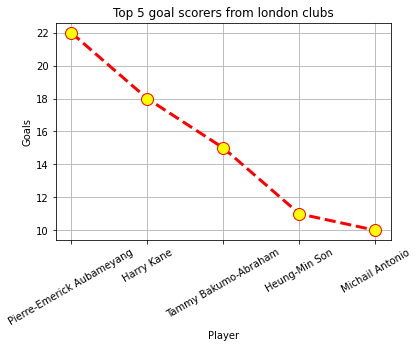

In [57]:

plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='yellow', markersize=12)
plt.xlabel("Player")
plt.xticks(rotation=30)
plt.ylabel("Goals")
plt.title("Top 5 goal scorers from london clubs")
plt.grid()
plt.show()


In [59]:
li = list(zip(x,y))
da = pd.DataFrame(li, columns = ['London Players','Goals'])
da

,London Players,Goals
0,Pierre-Emerick Aubameyang,22
1,Harry Kane,18
2,Tammy Bakumo-Abraham,15
3,Heung-Min Son,11
4,Michail Antonio,10
